# Computation of annotation enrichment in a genetic set 

This code excerpt shows how to use the annotation enrichment computation function in a genetic set.
The funciton return a dataframe of binom and hypergeometric p-value (<= 0.05) and for each p-value a fdr correction with alpha = 0.05.   

In the second part of the code we will compare the results obtained with the Great webserver and between the binomial and hypergeometric probability

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import greatpy as great
import pandas as pd
from math import inf
from numpy import log,nan, int64,cov,corrcoef
from scipy.stats import pearsonr
from seaborn import scatterplot as sp

import warnings
warnings.filterwarnings('ignore')

## I Compute the p-values

In [5]:
enrichment_fdr = great.tl.enrichment(
    test="../../data/test/02_srf_hg38.bed",
    regdom_file="../../data/human/regulatory_domain.bed",
    chr_size_file="../../data/human/chr_size.bed",
    annotation="../../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("fdr",0.05)
    )

ValueError: invalid literal for int() with base 10: 'SRF.1'

In [4]:
enrichment_fdr

,go_term,binom_p_value,hypergeom_p_value,binom_fdr_correction,hypergeom_fdr_correction
GO:0001523,retinoid metabolic process,4.70169e-04,1.76153e-01,2.09985e-03,NaN
GO:0002162,dystroglycan binding,1.29786e-05,4.02252e-02,1.24343e-04,NaN
GO:0005200,structural constituent of cytoskeleton,3.73899e-03,2.76213e-01,1.12170e-02,NaN
GO:0005201,extracellular matrix structural constituent,1.34489e-03,3.51826e-02,4.95080e-03,NaN
GO:0005604,basement membrane,1.05040e-02,2.50177e-01,2.55711e-02,NaN
...,...,...,...,...,...
GO:0045665,negative regulation of neuron differentiation,4.33459e-03,1.59024e-01,1.27463e-02,NaN
GO:0048387,negative regulation of retinoic acid receptor ...,8.90815e-06,2.60455e-02,9.62080e-05,NaN
GO:0002087,regulation of respiratory gaseous exchange by ...,2.07002e-05,3.74057e-02,1.70777e-04,NaN
GO:0051968,"positive regulation of synaptic transmission, ...",5.94155e-04,8.15551e-02,2.53905e-03,NaN


In [5]:
enrichment_bonferroni = great.tl.enrichment(
    test="../../data/human/test_genomic_region.bed",
    regdom_file="../../data/human/regulatory_domain.bed",
    chr_size_file="../../data/human/chr_size.bed",
    annotation="../../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("bonferroni",0.05),
    )

In [6]:
enrichment_bonferroni

,go_term,binom_p_value,hypergeom_p_value,binom_bonferroni_correction,hypergeom_bonferroni_correction
GO:0002162,dystroglycan binding,1.29786e-05,4.02252e-02,7.70928e-03,1.00000e+00
GO:0007213,G protein-coupled acetylcholine receptor signa...,4.28794e-05,4.86352e-02,2.54703e-02,1.00000e+00
GO:0033691,sialic acid binding,1.83861e-06,3.45779e-02,1.09214e-03,1.00000e+00
GO:0035374,chondroitin sulfate binding,1.06551e-06,2.60455e-02,6.32912e-04,1.00000e+00
GO:0043113,receptor clustering,6.53249e-05,7.61475e-02,3.88030e-02,1.00000e+00
...,...,...,...,...,...
GO:0008479,queuine tRNA-ribosyltransferase activity,1.75630e-05,1.16594e-02,1.04324e-02,1.00000e+00
GO:0101030,tRNA-guanine transglycosylation,2.90290e-05,1.16594e-02,1.72432e-02,1.00000e+00
GO:0044323,retinoic acid-responsive element binding,4.63051e-07,1.16594e-02,2.75052e-04,1.00000e+00
GO:0048387,negative regulation of retinoic acid receptor ...,8.90815e-06,2.60455e-02,5.29144e-03,1.00000e+00


In [7]:
enrichment_tot = enrichment_fdr 
enrichment_tot["binom_bonferroni_correction"] = enrichment_bonferroni["binom_bonferroni_correction"]
enrichment_tot["hypergeom_bonferroni_correction"] = enrichment_bonferroni["hypergeom_bonferroni_correction"]
enrichment_tot = enrichment_tot[["binom_p_value","binom_bonferroni_correction","binom_fdr_correction","hypergeom_p_value","hypergeom_bonferroni_correction","hypergeom_fdr_correction"]]
enrichment_tot = enrichment_tot.reset_index().rename(columns={"index":"id","binom_bonferroni_correction":"binom_bonferroni","binom_fdr_correction":"binom_fdr","hypergeom_p_value":"hyper_p_value","hypergeom_bonferroni_correction":"hyper_bonferroni","hypergeom_fdr_correction":"hyper_fdr"})
enrichment_tot

,id,binom_p_value,binom_bonferroni,binom_fdr,hyper_p_value,hyper_bonferroni,hyper_fdr
0,GO:0001523,4.70169e-04,NaN,2.09985e-03,1.76153e-01,NaN,NaN
1,GO:0002162,1.29786e-05,7.70928e-03,1.24343e-04,4.02252e-02,1.00000e+00,NaN
2,GO:0005200,3.73899e-03,NaN,1.12170e-02,2.76213e-01,NaN,NaN
3,GO:0005201,1.34489e-03,NaN,4.95080e-03,3.51826e-02,NaN,NaN
4,GO:0005604,1.05040e-02,NaN,2.55711e-02,2.50177e-01,NaN,NaN
...,...,...,...,...,...,...,...
263,GO:0045665,4.33459e-03,NaN,1.27463e-02,1.59024e-01,NaN,NaN
264,GO:0048387,8.90815e-06,5.29144e-03,9.62080e-05,2.60455e-02,1.00000e+00,NaN
265,GO:0002087,2.07002e-05,1.22959e-02,1.70777e-04,3.74057e-02,1.00000e+00,NaN
266,GO:0051968,5.94155e-04,NaN,2.53905e-03,8.15551e-02,NaN,NaN


## II Compare to GREAT webserver  

### II.1 Import the data

In [8]:
great_webserver = pd.read_csv("../../data/output_great_webserver.tsv",sep="\t",comment="#",
                    names=["ontologie","term_name","ID","binom_p_value","binom_bonferroni","binom_fdr","hyper_p_value","hyper_bonferroni","hyper_fdr"],index_col=False,
                    dtype={"term_name":"object", "ID":"object","binom_p_value":"float64", "binom_bonferroni":"float64", "binom_fdr":"float64", "hyper_p_value":"float64", "hyper_bonferroni":"float64", "hyper_fdr":"float64"})
great_webserver.rename(columns={"ID":"id"},inplace=True)
del great_webserver["ontologie"]
del great_webserver["term_name"]

### II.2 Compare the results between greatpy and great 

#### II.2.1 Preprocessing

In [9]:
before_pp = enrichment_tot.shape[0]

In [10]:
enrichment_tot = enrichment_tot[enrichment_tot["id"].isin(list(great_webserver["id"]))]
enrichment_tot = enrichment_tot.sort_values("id")
after_pp = enrichment_tot.shape[0]

In [11]:
great_webserver = great_webserver[great_webserver["id"].isin(list(enrichment_tot["id"]))]
great_webserver = great_webserver.sort_values("id")

In [12]:
binom_greatpy = hyper_greatpy = binom_great = hyper_great = []
for i in range(enrichment_tot.shape[0]) : 
    curr_enrichment = enrichment_tot.iloc[i]
    curr_great_webserver = great_webserver.loc[great_webserver["id"]==curr_enrichment["id"]]
    binom_greatpy.append(float(curr_enrichment["binom_p_value"]))
    hyper_greatpy.append(float(curr_enrichment["hyper_p_value"]))
    binom_great.append(float(curr_great_webserver["binom_p_value"]))
    hyper_great.append(float(curr_great_webserver["hyper_p_value"]))
binom = pd.DataFrame({"binom_greatpy":binom_greatpy,"binom_great":binom_great})
hyper = pd.DataFrame({"hyper_greatpy":hyper_greatpy,"hyper_great":hyper_great})

#### II.2.b Graphical

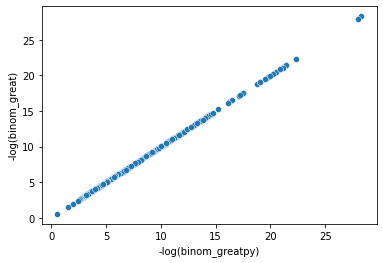

In [13]:
pl=great.pl.scatterplot(binom,colname_x="binom_greatpy",colname_y="binom_great")

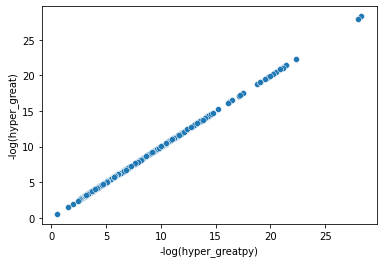

In [14]:
great.pl.scatterplot(hyper,colname_x="hyper_greatpy",colname_y="hyper_great")

#### II.2.c Statistics

In [15]:
def stat(binom_great_list_list, hyper_great_listpy_list,binom_great_list,hyper_great_list) : 
    return pd.DataFrame({
        "binom": [cov(m = binom_great_list_list, y = binom_great_list)[0][1],pearsonr(binom_great_list_list,binom_great_list)[0]],
        "hyper":[cov(m = hyper_great_listpy_list, y = hyper_great_list)[0][1],pearsonr(hyper_great_listpy_list,hyper_great_list)[0]]},
        index=["correlation_coefficient","pearson"])

In [16]:
stat(binom_greatpy, hyper_greatpy,binom_great,hyper_great)

,binom,hyper
correlation_coefficient,1.30859e-03,1.30859e-03
pearson,1.00000e+00,1.00000e+00


In [17]:
print(before_pp)
print(after_pp)

268
92


We went from 268 ontology terms in greatpy output to 92 ontology terms by selecting the GO identifiers present in both greatpy and great 

But when two ontology terms are selected they have the same binomial and hypergeometric probability value 